<a href="https://colab.research.google.com/github/aylinazlina/DL/blob/main/Fashion_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fashion-Mnist is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a set of 10,000 examples.

In [2]:
# For further assistance https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [3]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28) ,y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


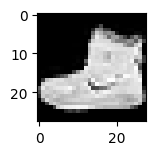

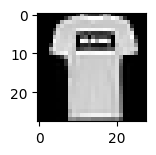

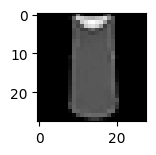

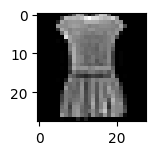

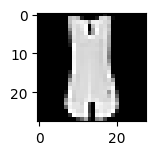

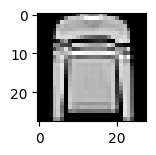

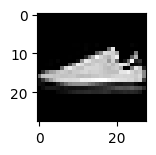

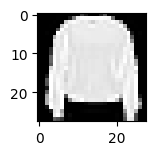

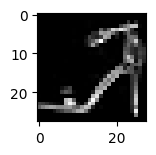

In [4]:
from tensorflow.python import train
#example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s ,y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
#plot first few images
for i in range(9):
  #define subplot
  pyplot.subplot(330 + 1 + i)
  #plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
  #show the figure
  pyplot.show()

In [6]:
#reshape dataset to have a single channel
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

#convert from integers to floats
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')

#Nor.0 to 1
train_X=train_X/255
test_X=test_X/255

#convert to one hot encoder(vector)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [7]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28 ,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
model.fit(train_X, train_Y_one_hot,batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 61s 64ms/step - loss: 1.0419 - accuracy: 0.6242
Epoch 2/5
938/938 [==============================] - 57s 61ms/step - loss: 0.6797 - accuracy: 0.7448
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.6156 - accuracy: 0.7689
Epoch 4/5
938/938 [==============================] - 58s 61ms/step - loss: 0.5704 - accuracy: 0.7889
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.5376 - accuracy: 0.8000


In [9]:
#sinle Value prediction in number (category)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

313/313 [==============================] - 3s 9ms/step
2


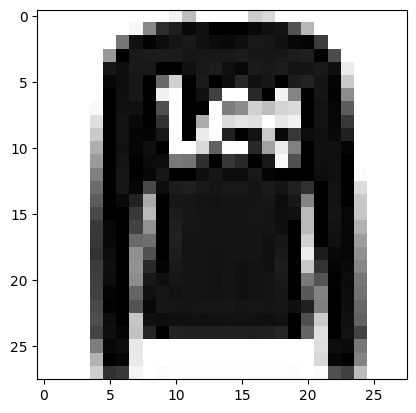

In [11]:
#sinle Value prediction in graph (plot)
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()